# SIMPLE LINEAR REGRESSION

## 1. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset

In [2]:
wc_at_dataset= pd.read_csv('WC_AT.csv',sep=',')
wc_at_dataset.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


## 3. Data Understanding

###     3.1  Initial Analysis

In [3]:
wc_at_dataset.shape

(109, 2)

In [4]:
wc_at_dataset.isna().sum()

Waist    0
AT       0
dtype: int64

In [5]:
wc_at_dataset.dtypes

Waist    float64
AT       float64
dtype: object

### 3.2 Assumptions check

####  (i) Linearity Check

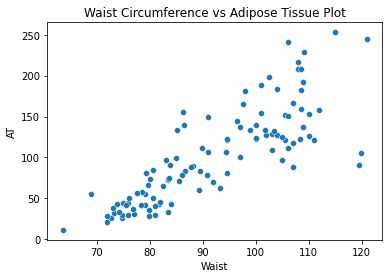

In [7]:
sns.scatterplot(x='Waist',y='AT',data=wc_at_dataset)
plt.title('Waist Circumference vs Adipose Tissue Plot')
plt.show()

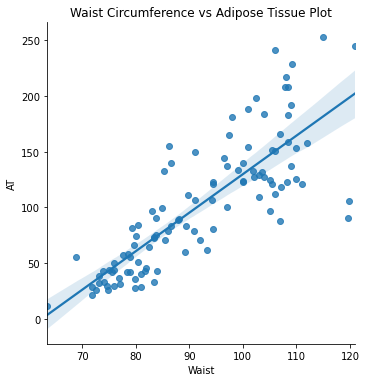

In [8]:
sns.lmplot(x='Waist',y='AT',data=wc_at_dataset)
plt.title('Waist Circumference vs Adipose Tissue Plot')
plt.show()

#### (ii) Normality Test

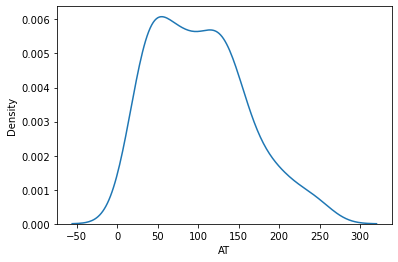

In [12]:
sns.distplot(a=wc_at_dataset['AT'],hist=False)
plt.show()

In [14]:
wc_at_dataset['AT'].skew()

0.584869324127853

#### (iii) Multi-collinearity test -- only one input and output variable so this test cannot be performed

#### (iv) No Autoregression - No time based values in the dataset

#### (v) Homoscadascity test | (vi) Zero residual mean check - can be only performed after model deployement

## 4. Data Preparation

In [15]:
wc_at_dataset.dtypes

Waist    float64
AT       float64
dtype: object

In [16]:
wc_at_dataset.isna().sum()

Waist    0
AT       0
dtype: int64

## 5. Model Building | 6. Model Training (Using statsmodel library)
### model building and model training is done simultaneously using 'OLS technique' (Ordinary Least Square).

In [17]:
import statsmodels.formula.api as smf

In [20]:
linear_model_2= smf.ols(formula='Waist~AT',data=wc_at_dataset).fit() #Model building and Model training

In [21]:
linear_model_2.params

Intercept    72.163315
AT            0.193716
dtype: float64

## 7. Model Testing 

### I. Manual testing

In [35]:
#y= mx + c
x= 30.0
y= (x*0.193716) + 72.163315
round(y,4)

77.9748

In [36]:
#y= mx + c
#x= 40 ,y= ?
y= (40*0.193716) + 72.163315
round(y,4)

79.912

### II. Machine testing

In [27]:
test_data = pd.read_csv('WC_AT-1 New dataset.csv',sep=',')
test_data.head()

,AT
0,30.0
1,40.3
2,46.0
3,46.7
4,22.8


In [28]:
linear_model_2.predict(test_data)

0     77.974800
1     79.970076
2     81.074258
3     81.209859
4     76.580043
5     77.335536
6     78.362232
7     79.059610
8     77.161192
9     76.580043
10    79.369556
11    77.548624
12    77.296793
13    79.873218
14    76.425070
15    78.149144
16    79.950704
17    78.672178
18    76.812503
19    79.911961
dtype: float64

## 8. Model evaluation - -----

## 9. Model Deployement

In [37]:
from pickle import dump

In [38]:
dump(linear_model_2,open('linear_model_2.pkl','wb'))

In [40]:
from pickle import load

In [41]:
load_pkl_file= load(open('linear_model_2.pkl','rb'))

In [ ]:
load_pkl_file.predict()